# Численное решение задачи Коши.
## Вариант 6

In [44]:
import numpy as np
from pandas import DataFrame as df
from scipy.integrate import odeint
import matplotlib.pyplot as pyplot

In [45]:
def F(y, x):
    return 1 + (0.5 - x) * np.sin(y) - (1 + x) * y

In [46]:
x0 = 0
y0 = 0
h = 0.1
x = np.arange(0, 1.1, h)

### 1) Получить таблицу значений решения задачи c шагом h = 0.1 на [0, 1], используя функции математического пакета — y_math

Значения, полученные через Maple:

In [47]:
y_math = [
    0.,
    0.09689591666531316,
    0.18537379054306496,
    0.2626922824598868,
    0.32700405846377045,
    0.3774127936306311,
    0.41391770899526215,
    0.4372770993279668,
    0.4488262387668105, 
    0.45028158229670845,
    0.4435535458362077
]

In [48]:
d = {'$x$': x, '$y_{math}$': y_math}
table = df(data=d)
table.style.hide_index()

$x$,$y_{math}$
0.000000,0.000000
0.100000,0.096896
0.200000,0.185374
0.300000,0.262692
0.400000,0.327004
0.500000,0.377413
0.600000,0.413918
0.700000,0.437277
0.800000,0.448826
0.900000,0.450282


### 2) Методом Эйлера получить таблицу решения на [0, 0.5]

In [49]:
def euler(x, h):
    y = x * 0
    # y[0] известно из задачи Коши --- y(0) = 0;
    for m in range(0, len(x) - 1):
        yy = y[m] + h * F(x[m], y[m])
        y[m + 1] = y[m] + h / 2. * (F(x[m], y[m]) + F(x[m+1], yy))
    return y

#### C шагом h - $y_h$

In [50]:
xh = np.arange(0, 1. + h, h)
yh = euler(xh, h)

#### C шагом h/2 - $y_{h/2}$

In [51]:
xh2 = np.arange(0, 1. + h/2, h/2)
yh2 = euler(xh2, h/2)

#### Уточнить решение по Ричардсону - $y_{rev}$

In [52]:
# s = 2
y_rev = yh
R = yh
for m in range(len(x)):
    R[m] = (yh2[2 * m] - yh[m]) / 3
    y_rev[m] = yh2[2 * m] + R[m]

### 3) Напечатать таблицу значений y_math, y h , y h/2 , y_rev, y_rev − y_math в точках с шагом h.

In [53]:
d = {'$x$': x,
     '$y_{math}$': y_math,
     '$y_{h}$': yh,
     '$y_{h/2}$': yh2[0:len(yh2):2],
     '$y_{rev}$': y_rev,
     '$y_{rev} - y_{math}$': y_rev - y_math}
table = df(data=d)
table.style.hide_index()

$x$,$y_{math}$,$y_{h}$,$y_{h/2}$,$y_{rev}$,$y_{rev} - y_{math}$
0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.100000,0.096896,0.096849,0.096761,0.096849,-0.000047
0.200000,0.185374,0.184932,0.184753,0.184932,-0.000442
0.300000,0.262692,0.261034,0.260764,0.261034,-0.001659
0.400000,0.327004,0.322770,0.322413,0.322770,-0.004234
0.500000,0.377413,0.368735,0.368300,0.368735,-0.008678
0.600000,0.413918,0.398536,0.398037,0.398536,-0.015381
0.700000,0.437277,0.412713,0.412168,0.412713,-0.024565
0.800000,0.448826,0.412569,0.412002,0.412569,-0.036258
0.900000,0.450282,0.399953,0.399388,0.399953,-0.050329


### 4) Построить графики заданных таблично функций в одних осях координат.

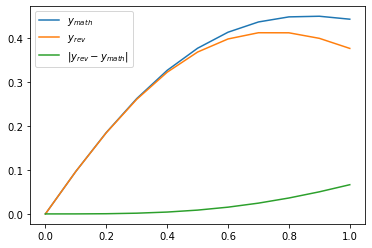

In [55]:
pyplot.plot(x, y_math)
pyplot.plot(x, y_rev)
pyplot.plot(x, abs(y_rev - y_math))

pyplot.legend(('$y_{math}$', '$y_{rev}$', '$|y_{rev} - y_{math}|$'))

pyplot.show()

### 5) Вычислить решение методом Рунге-Кутты 4-ого порядка

In [56]:
y_rk = x * 0
for m in range(len(x) - 1):
    k1 = h * F(x[m], y_rk[m])
    k2 = h * F(x[m] + h/2, y_rk[m] + k1/2)
    k3 = h * F(x[m] + h/2, y_rk[m] + k2/2)
    k4 = h * F(x[m] + h, y_rk[m] + k3)
    y_rk[m+1] = y_rk[m] + (k1 + 2 * k2 + 2 * k3 + k4) / 6;

In [57]:
d = {'$x$': x, '$y_{RK}$': y_rk}
table = df(data=d)
table.style.hide_index()

$x$,$y_{RK}$
0.000000,0.000000
0.100000,0.096847
0.200000,0.184925
0.300000,0.261021
0.400000,0.322750
0.500000,0.368708
0.600000,0.398501
0.700000,0.412670
0.800000,0.412520
0.900000,0.399900


### 6) Вычислить решение экстраполяционным методом Адамса 5-ого порядка с шагом из метода Рунге-Кутты на промежутке [5h, 1] — y_Ad_ex. Начало таблицы строить методом Рунге-Кутты.

In [58]:
x_Ad_ex = np.arange(5*h, 1. + h / 2., h)
y_Ad_ex = x_Ad_ex * 0

x_adams = np.arange(0, 4 * h + h / 2., h)
y_adams = x_adams * 0
for m in range(len(x_adams) - 1):
    k1 = h * F(x[m], y_adams[m])
    k2 = h * F(x[m] + h/2, y_adams[m] + k1/2)
    k3 = h * F(x[m] + h/2, y_adams[m] + k2/2)
    k4 = h * F(x[m] + h, y_adams[m] + k3)
    y_adams[m+1] = y_adams[m] + (k1 + 2 * k2 + 2 * k3 + k4) / 6;
    
q = []
for m in range(len(x_adams)):
    q.append(h * F(y_adams[m], x_adams[m]))
    
y_Ad_ex[0] = y_adams[4]
for m in range(len(x_Ad_ex)-1):
        y_Ad_ex[m + 1] = (y_Ad_ex[m] + (1901 * q[m + 4] - 2774 * q[m + 3] + 2616 * q[m + 2] - 1274 * q[m + 1] + 251 * q[m]) / 720.)
        q.append(h * F(y_Ad_ex[m + 1], x_Ad_ex[m + 1]))
        
d = {'x_Ad_ex': x_Ad_ex, 'y_Ad_ex': y_Ad_ex}
table = df(data=d)
table.style.hide_index()

x_Ad_ex,y_Ad_ex
0.500000,0.322750
0.600000,0.374094
0.700000,0.390883
0.800000,0.432453
0.900000,0.412669
1.000000,0.440252


### 7) Вычислить решение интерполяционным методом Адамса 5-ого порядка с шагом h на промежутке [5h, 1] --- y_Ad_in

In [59]:
x_Ad_in = np.arange(5 * h, 1. + h/2., h)
y_Ad_in = x_Ad_in * 0

q = []
for m in range(len(x)):
    q.append(h * F(y_rk[i], x[i]))

y_Ad_in[0] = y_rk[4]
for m in range(len(y_Ad_in) - 1):
        y_Ad_in[m + 1] = y_Ad_in[m] + (251 * q[m + 4] + 646 * q[m + 3] - 264 * q[m + 2] + 106 * q[m + 1] - 19 * q[m]) / 720.

d = {'x_Ad_in': x_Ad_in, 'y_Ad_in': y_Ad_in}
table = df(data=d)
table.style.hide_index()

x_Ad_in,y_Ad_in
0.500000,0.322750
0.600000,0.380737
0.700000,0.438724
0.800000,0.496710
0.900000,0.554697
1.000000,0.612684


### Напечатать таблицу значений y_math и погрешностей

In [60]:
d = {
        'x': x[5:],
        'y_math': y_math[5:],
        '|y_math - y_rk|': [abs(y_math[i] - y_rk[i]) for i in range(5, len(y_math))],
        '|y_math - y_Ad_ex|': [abs(y_math[i+5] - y_Ad_ex[i]) for i in range(len(y_Ad_ex))],
        '|y_math - y_Ad_in|': [abs(y_math[i+5] - y_Ad_in[i]) for i in range(len(y_Ad_in))]
}
table = df(data=d)
table.style.hide_index()

x,y_math,|y_math - y_rk|,|y_math - y_Ad_ex|,|y_math - y_Ad_in|
0.500000,0.377413,0.008705,0.054662,0.054662
0.600000,0.413918,0.015417,0.039823,0.033181
0.700000,0.437277,0.024607,0.046394,0.001447
0.800000,0.448826,0.036307,0.016373,0.047884
0.900000,0.450282,0.050382,0.037612,0.104416
1.000000,0.443554,0.066589,0.003302,0.169130
